In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Intra Subject

In [51]:
#def LoadResults(model):
model = "EffNet"
phase = "Intra"
respath = os.path.join("res_"+model,phase)
allfiles = os.listdir(respath)
datfiles = [file for file in allfiles if file[-4:]=="json"]
gc3dat = [file for file in datfiles if file.__contains__("GC3")]
rgbdat = [file for file in datfiles if file.__contains__("RGB")]
gc3paths = [os.path.join(respath,file) for file in gc3dat]
rgbpaths = [os.path.join(respath,file) for file in rgbdat]

for i in range(len(gc3dat)):
    with open(gc3paths[i]) as f:
        gc3dat[i] = json.load(f)
for i in range(len(rgbdat)):
    with open(rgbpaths[i]) as f:
        rgbdat[i] = json.load(f)

# Results loaded

In [52]:
def plotRes(indata, suptitle, lab=None, ylim=None):
    fig, ax = plt.subplots(1,2,figsize=(12,3))
    colors = ["r", "g", "b"]
    if lab == None:
        lab = {"PT_"+model+"_Freeze": "Fine Tune",
            "PT_"+model+"_Tune": "Full Tune",
            "UT_"+model+"_Tune": "Full Train"
            }
    # plot
    for index in range(3):
        title = list(indata[index].keys())[0]
        data = indata[index][title]
        n = len(data["loss"]["train"])
        for phase in ["train","val"]:
            style = None
            if phase == "train":
                style = "dotted"
            ax[0].plot(range(n),data["loss"][phase], label=lab[title]+" "+phase.capitalize(), color=colors[index], linestyle = style)
            ax[0].set_ylabel("Loss")
            ax[0].set_xlabel("Epochs")
            if ylim:
                ax[0].set_ylim(top=ylim[1],bottom=ylim[0])
            #ax[0].legend()
            ax[1].plot(range(n),data["acc"][phase], label=lab[title]+" "+phase.capitalize(), color=colors[index], linestyle = style)
            ax[1].set_ylabel("Accuracy [%]")
            ax[1].set_xlabel("Epochs")
            ax[1].legend(bbox_to_anchor=(1.4, 0.7))

            if phase == "val":
                print("Max "+lab[title]+" val acc", np.max(data["acc"][phase]))
                print("Mean "+lab[title]+" val acc", np.mean(data["acc"][phase]))
    fig.suptitle(suptitle)


Max Fine Tune val acc 0.6166666666666667
Mean Fine Tune val acc 0.5576666666666666
Max Full Tune val acc 0.65
Mean Full Tune val acc 0.5664999999999999
Max Full Train val acc 0.6
Mean Full Train val acc 0.5071666666666667


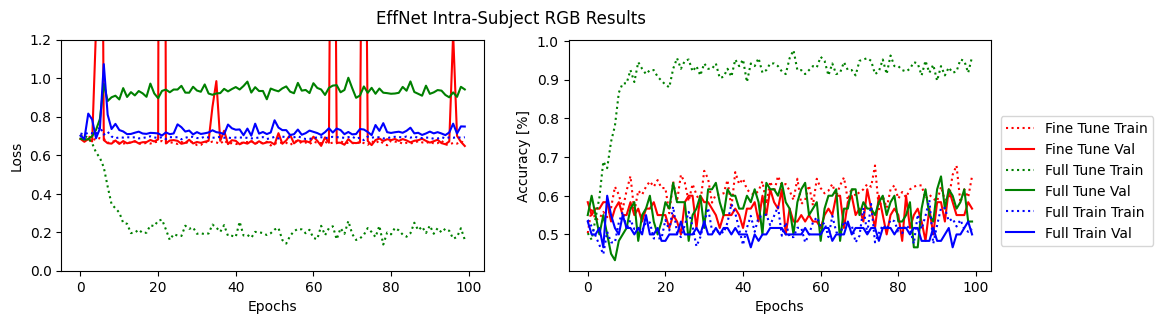

In [56]:
plotRes(rgbdat, suptitle=model+" Intra-Subject RGB Results",ylim=[0,1.2])

# Inter Subject

## ResNet

In [57]:
#def LoadResults(model):
model = "EffNet"
phase = "Inter"
respath = os.path.join("res_"+model,phase)
allfiles = os.listdir(respath)
datfiles = [file for file in allfiles if file[-4:]=="json"]
gc3dat = [file for file in datfiles if file.__contains__("GC3")]
rgbdat = [file for file in datfiles if file.__contains__("RGB")]
gc3paths = [os.path.join(respath,file) for file in gc3dat]
rgbpaths = [os.path.join(respath,file) for file in rgbdat]

for i in range(len(gc3dat)):
    with open(gc3paths[i]) as f:
        gc3dat[i] = json.load(f)
for i in range(len(rgbdat)):
    with open(rgbpaths[i]) as f:
        rgbdat[i] = json.load(f)

# Results loaded

In [59]:
def plotRes(indata, suptitle, color, ylim=None, lab=None):
    fig, ax = plt.subplots(1,2,figsize=(12,3))
    colors = ["r", "g", "b"]
    if lab:
        pass
    else:
        lab = {color+"_Tune_Block": "Tune Block",
                color+"_Tune_FC": "Tune FC",
                color+"_Tune_Full": "Tune Full"
                }
    # plot
    for index in range(3):
        title = list(indata[index].keys())[0]
        data = indata[index][title]
        n = len(data["loss"]["train"])
        for phase in ["train","val"]:
            style = None
            if phase == "train":
                style = "dotted"
            ax[0].plot(range(n),data["loss"][phase], label=lab[title]+" "+phase.capitalize(), color=colors[index], linestyle = style)
            ax[0].set_ylabel("Loss")
            ax[0].set_xlabel("Epochs")
            if ylim:
                ax[0].set_ylim(top=ylim[1],bottom=ylim[0])
            #ax[0].legend()
            ax[1].plot(range(n),data["acc"][phase], label=lab[title]+" "+phase.capitalize(), color=colors[index], linestyle = style)
            ax[1].set_ylabel("Accuracy [%]")
            ax[1].set_xlabel("Epochs")
            ax[1].legend(bbox_to_anchor=(1, 0.7))

            if phase == "val":
                print("Max "+lab[title]+" val acc", np.max(data["acc"][phase]))
                print("Mean "+lab[title]+" val acc", np.mean(data["acc"][phase]))
    fig.suptitle(suptitle)


Max Tune Block val acc 0.5284090909090909
Mean Tune Block val acc 0.4894886363636365
Max Tune FC val acc 0.5113636363636364
Mean Tune FC val acc 0.47795454545454547
Max Tune Full val acc 0.5255681818181819
Mean Tune Full val acc 0.4900568181818181


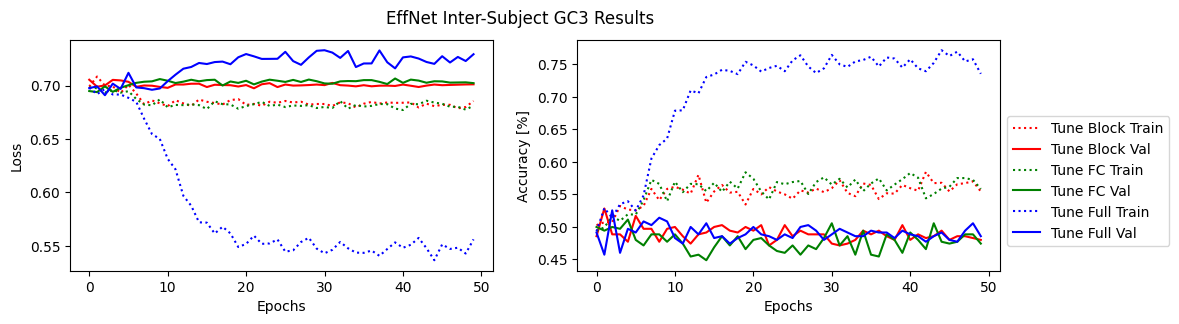

In [60]:
color = "GC3"
plotRes(gc3dat, suptitle=model+" "+phase+"-Subject GC3 Results", color=color)

Max Tune Block val acc 0.5681818181818182
Mean Tune Block val acc 0.5357386363636363
Max Tune FC val acc 0.5482954545454546
Mean Tune FC val acc 0.5206818181818182
Max Tune Full val acc 0.5227272727272727
Mean Tune Full val acc 0.495625


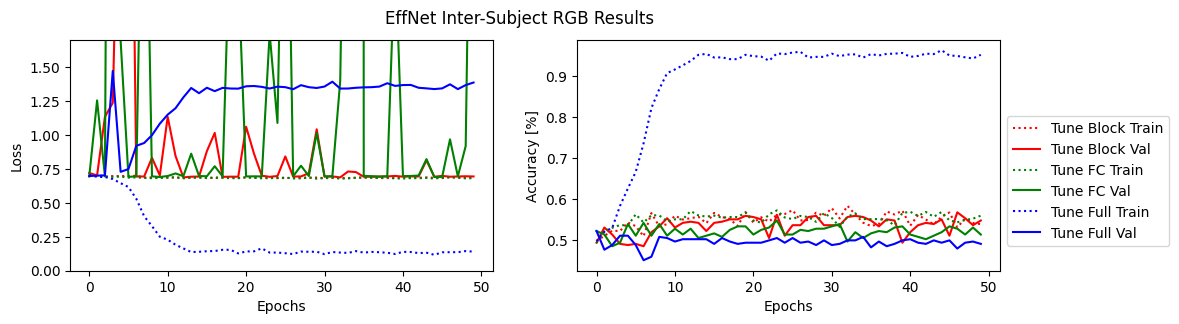

In [61]:
plotRes(rgbdat, suptitle=model+" "+phase+"-Subject RGB Results", color="RGB",ylim=[0,1.7])

## EffNet

In [30]:
#def LoadResults(model):
model = "EffNet"
respath = "res_"+model
allfiles = os.listdir(respath)
datfiles = [file for file in allfiles if file[-4:]=="json"]
gc3dat = [file for file in datfiles if file.__contains__("GC3")]
rgbdat = [file for file in datfiles if file.__contains__("RGB")]
gc3paths = [os.path.join(respath,file) for file in gc3dat]
rgbpaths = [os.path.join(respath,file) for file in rgbdat]

for i in range(len(gc3dat)):
    with open(gc3paths[i]) as f:
        gc3dat[i] = json.load(f)
for i in range(len(rgbdat)):
    with open(rgbpaths[i]) as f:
        rgbdat[i] = json.load(f)

# Results loaded

Max Tune Block val acc 0.5681818181818182
Mean Tune Block val acc 0.5357386363636363
Max Tune FC val acc 0.5482954545454546
Mean Tune FC val acc 0.5206818181818182
Max Tune Full val acc 0.5227272727272727
Mean Tune Full val acc 0.495625


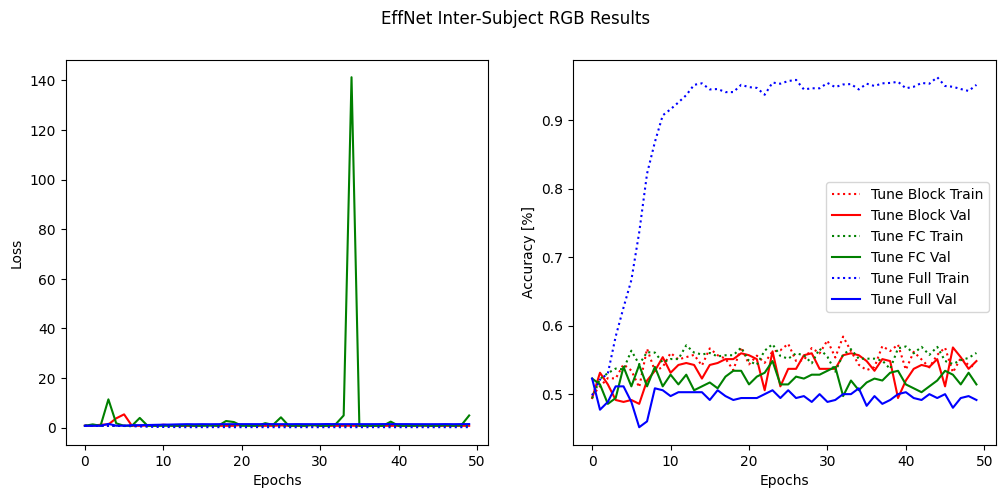

In [34]:
plotRes(rgbdat, suptitle=model+" Inter-Subject RGB Results", color="RGB")

Max Tune Block val acc 0.5284090909090909
Mean Tune Block val acc 0.4894886363636365
Max Tune FC val acc 0.5113636363636364
Mean Tune FC val acc 0.47795454545454547
Max Tune Full val acc 0.5255681818181819
Mean Tune Full val acc 0.4900568181818181


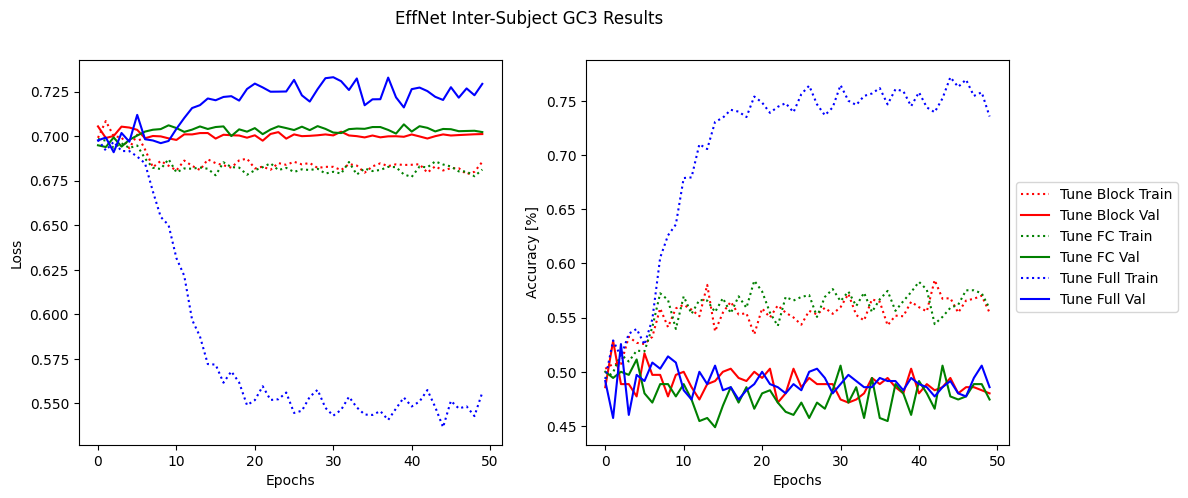

In [36]:
plotRes(gc3dat, suptitle=model+" Inter-Subject GC3 Results", color="GC3")

In [3]:
#def LoadResults(model):
model = "TL"
respath = "res_"+model
allfiles = os.listdir(respath)
datfiles = [file for file in allfiles if file[-4:]=="json"]
intradat = [file for file in datfiles if file.__contains__("Intra")]
interdat = [file for file in datfiles if file.__contains__("Inter")]
intrapaths = [os.path.join(respath,file) for file in intradat]
interpaths = [os.path.join(respath,file) for file in interdat]

for i in range(len(intradat)):
    with open(intrapaths[i]) as f:
        intradat[i] = json.load(f)
for i in range(len(interdat)):
    with open(interpaths[i]) as f:
        interdat[i] = json.load(f)

# Results loaded

In [4]:
def plotRes(indata, suptitle, lab=None, ylim=None):
    fig, ax = plt.subplots(1,2,figsize=(12,3))
    colors = ["r", "b"]
    if lab == None:
        lab = {"PT_"+model+"_Freeze": "Fine Tune",
            "PT_"+model+"_Tune": "Full Tune"
            }
    # plot
    for index in range(2):
        title = list(indata[index].keys())[0]
        data = indata[index][title]
        n = len(data["loss"]["train"])
        for phase in ["train","val"]:
            style = None
            if phase == "train":
                style = "dotted"
            ax[0].plot(range(n),data["loss"][phase], label=lab[title]+" "+phase.capitalize(), color=colors[index], linestyle = style)
            ax[0].set_ylabel("Loss")
            ax[0].set_xlabel("Epochs")
            if ylim:
                ax[0].set_ylim(top=ylim)
            #ax[0].legend()
            ax[1].plot(range(n),data["acc"][phase], label=lab[title]+" "+phase.capitalize(), color=colors[index], linestyle = style)
            ax[1].set_ylabel("Accuracy [%]")
            ax[1].set_xlabel("Epochs")
            ax[1].legend(bbox_to_anchor=(1.38, 0.7))

            if phase == "val":
                print("Max "+lab[title]+" val acc", np.max(data["acc"][phase]))
                print("Mean "+lab[title]+" val acc", np.mean(data["acc"][phase]))
    fig.suptitle(suptitle)


Max EffNet val acc 0.5511363636363636
Mean EffNet val acc 0.5106818181818182
Max ResNet val acc 0.5511363636363636
Mean ResNet val acc 0.5084090909090909


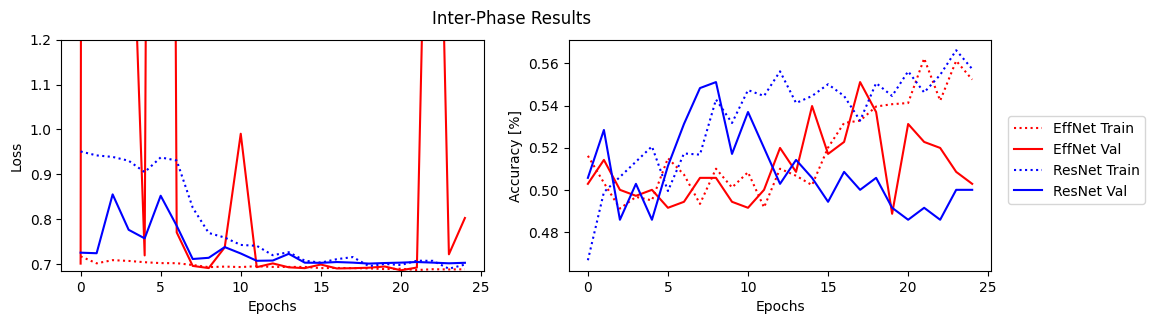

In [5]:
lab = {"EffNetInter55": "EffNet",
       "ResNetInter55": "ResNet"}
plotRes(interdat, suptitle="Inter-Phase Results", lab=lab, ylim=1.2)

Max EffNet val acc 0.6166666666666667
Mean EffNet val acc 0.5723333333333334
Max ResNet val acc 0.5833333333333334
Mean ResNet val acc 0.545


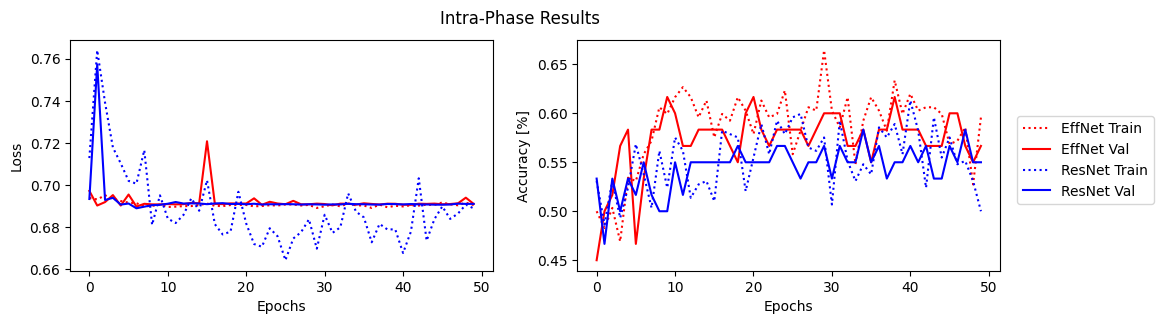

In [6]:
lab = {"EffNetIntra62": "EffNet",
       "ResNetIntra58": "ResNet"}
plotRes(intradat, suptitle="Intra-Phase Results", lab=lab)